# The Prediction of Client Subscription to Bank Deposits


Danni Li ; Vanessa Pang; Zunquan Wang; Diane Xu; Zibo Shang

# Introduction

A term deposit is a type of investment where after depositing funds into a financial institution, the client is guaranteed a specific return rate at the end of that fixed term. Banks have often been interested in knowing what type of clients subscribes to these term deposits. Therefore, this research project will address the question, “Given a new client, will they subscribe to a term deposit?”   

The dataset used to explore the above question is taken from the UCI Machine Learning Repository and is titled bank-additional-full.csv. This file includes 41188 observations and 20 input variables, ranging from May 2008 to November 2010. The target variable is y, a boolean: Yes if the client subscribes to a term deposit, and No otherwise. 


# Preliminary Exploratory Data Analysis

# Methods

# Expected Outcomes and Significance

# References

In [4]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [23]:
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip","bank.zip")
unzip("bank.zip", "bank-full.csv")
bank <- read.csv("bank-full.csv", sep=";", header = TRUE) %>%
     mutate(y = as_factor(y))
     
bank


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [64]:
bank_split <- initial_split(bank, prop = 0.8, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)

bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45206,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


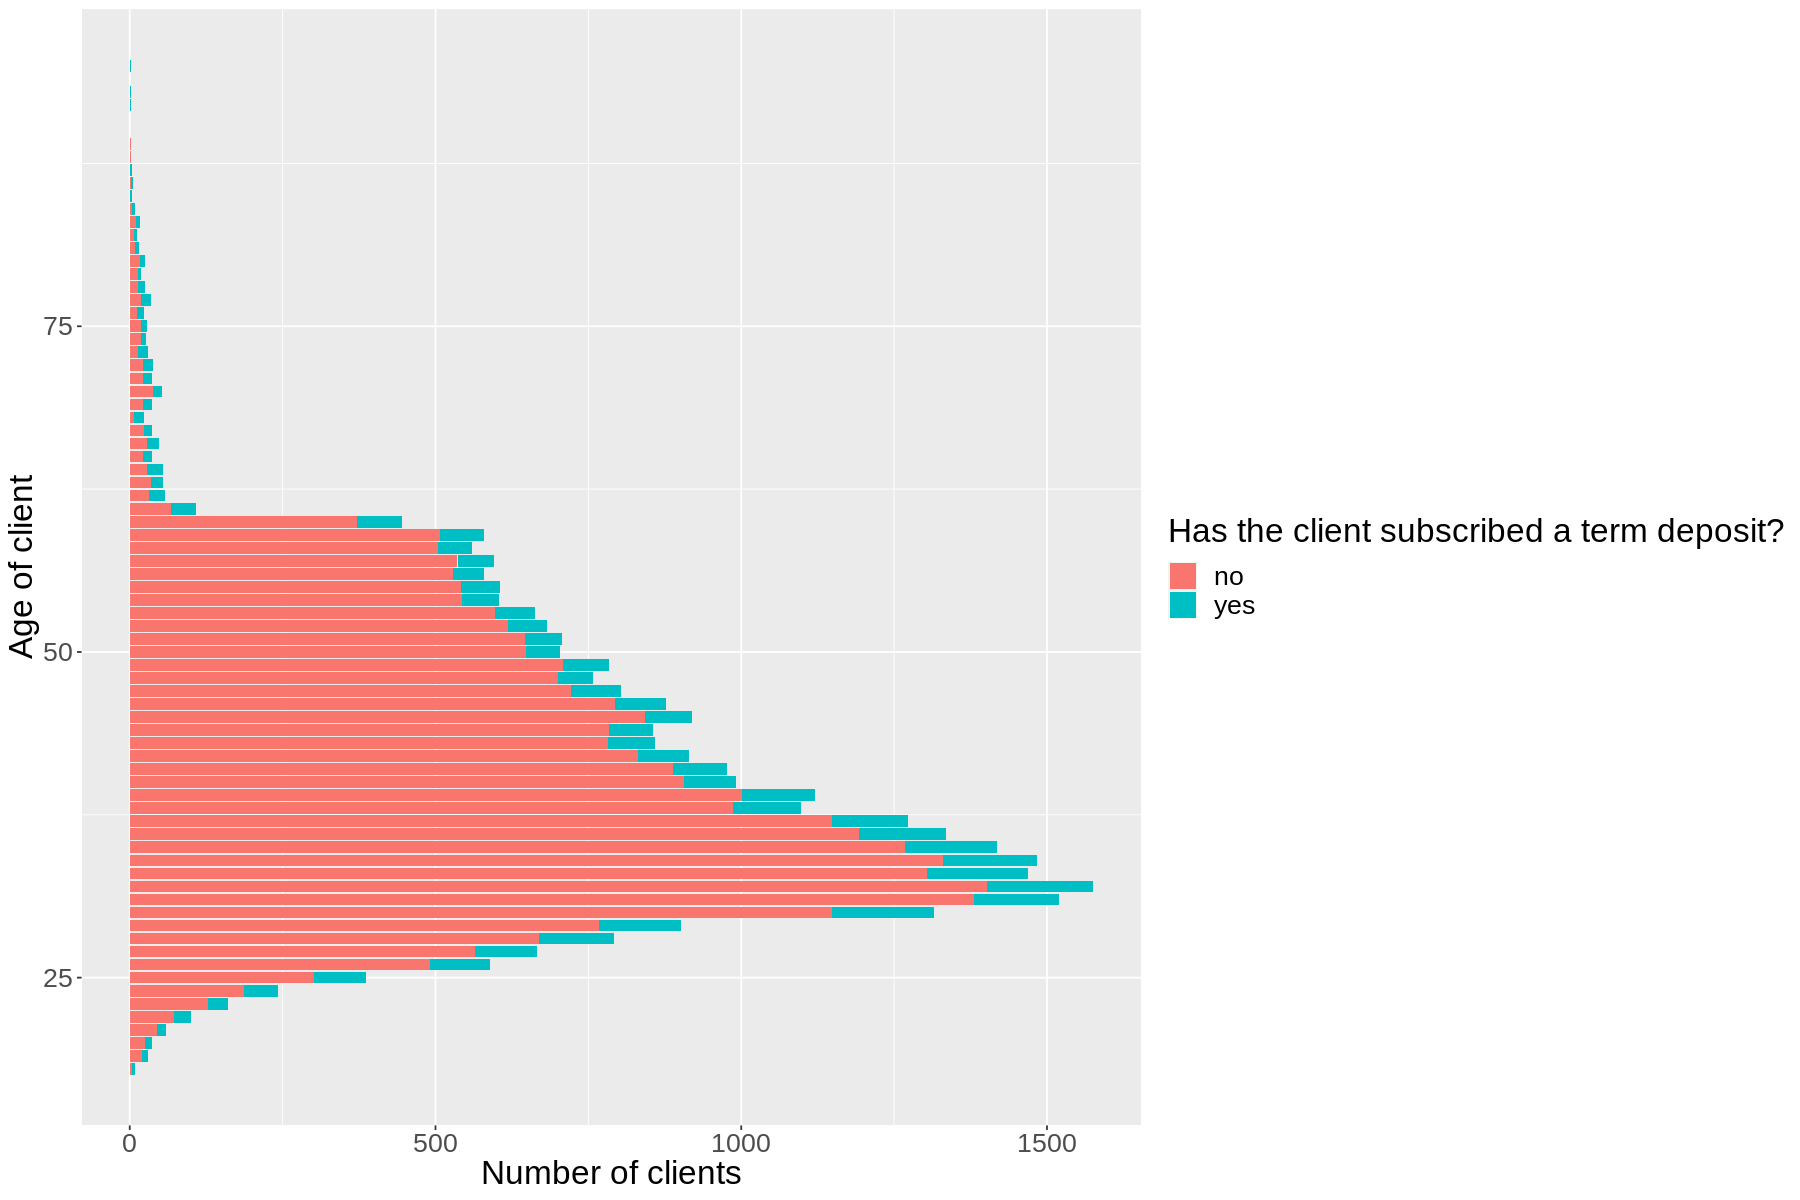

In [57]:
#bar chart of age and term deposit(predict variable)
options(repr.plot.width = 15, repr.plot.height = 10) 
age_subscribe_plot <- 
     ggplot(bank_train, aes(y = age)) +
     geom_bar(aes(fill = y), position = position_stack(reverse = TRUE)) +
     labs(x = "Number of clients", y = "Age of client", fill = "Has the client subscribed a term deposit?") +
     theme(legend.position = "right", text = element_text(size = 20))

age_subscribe_plot


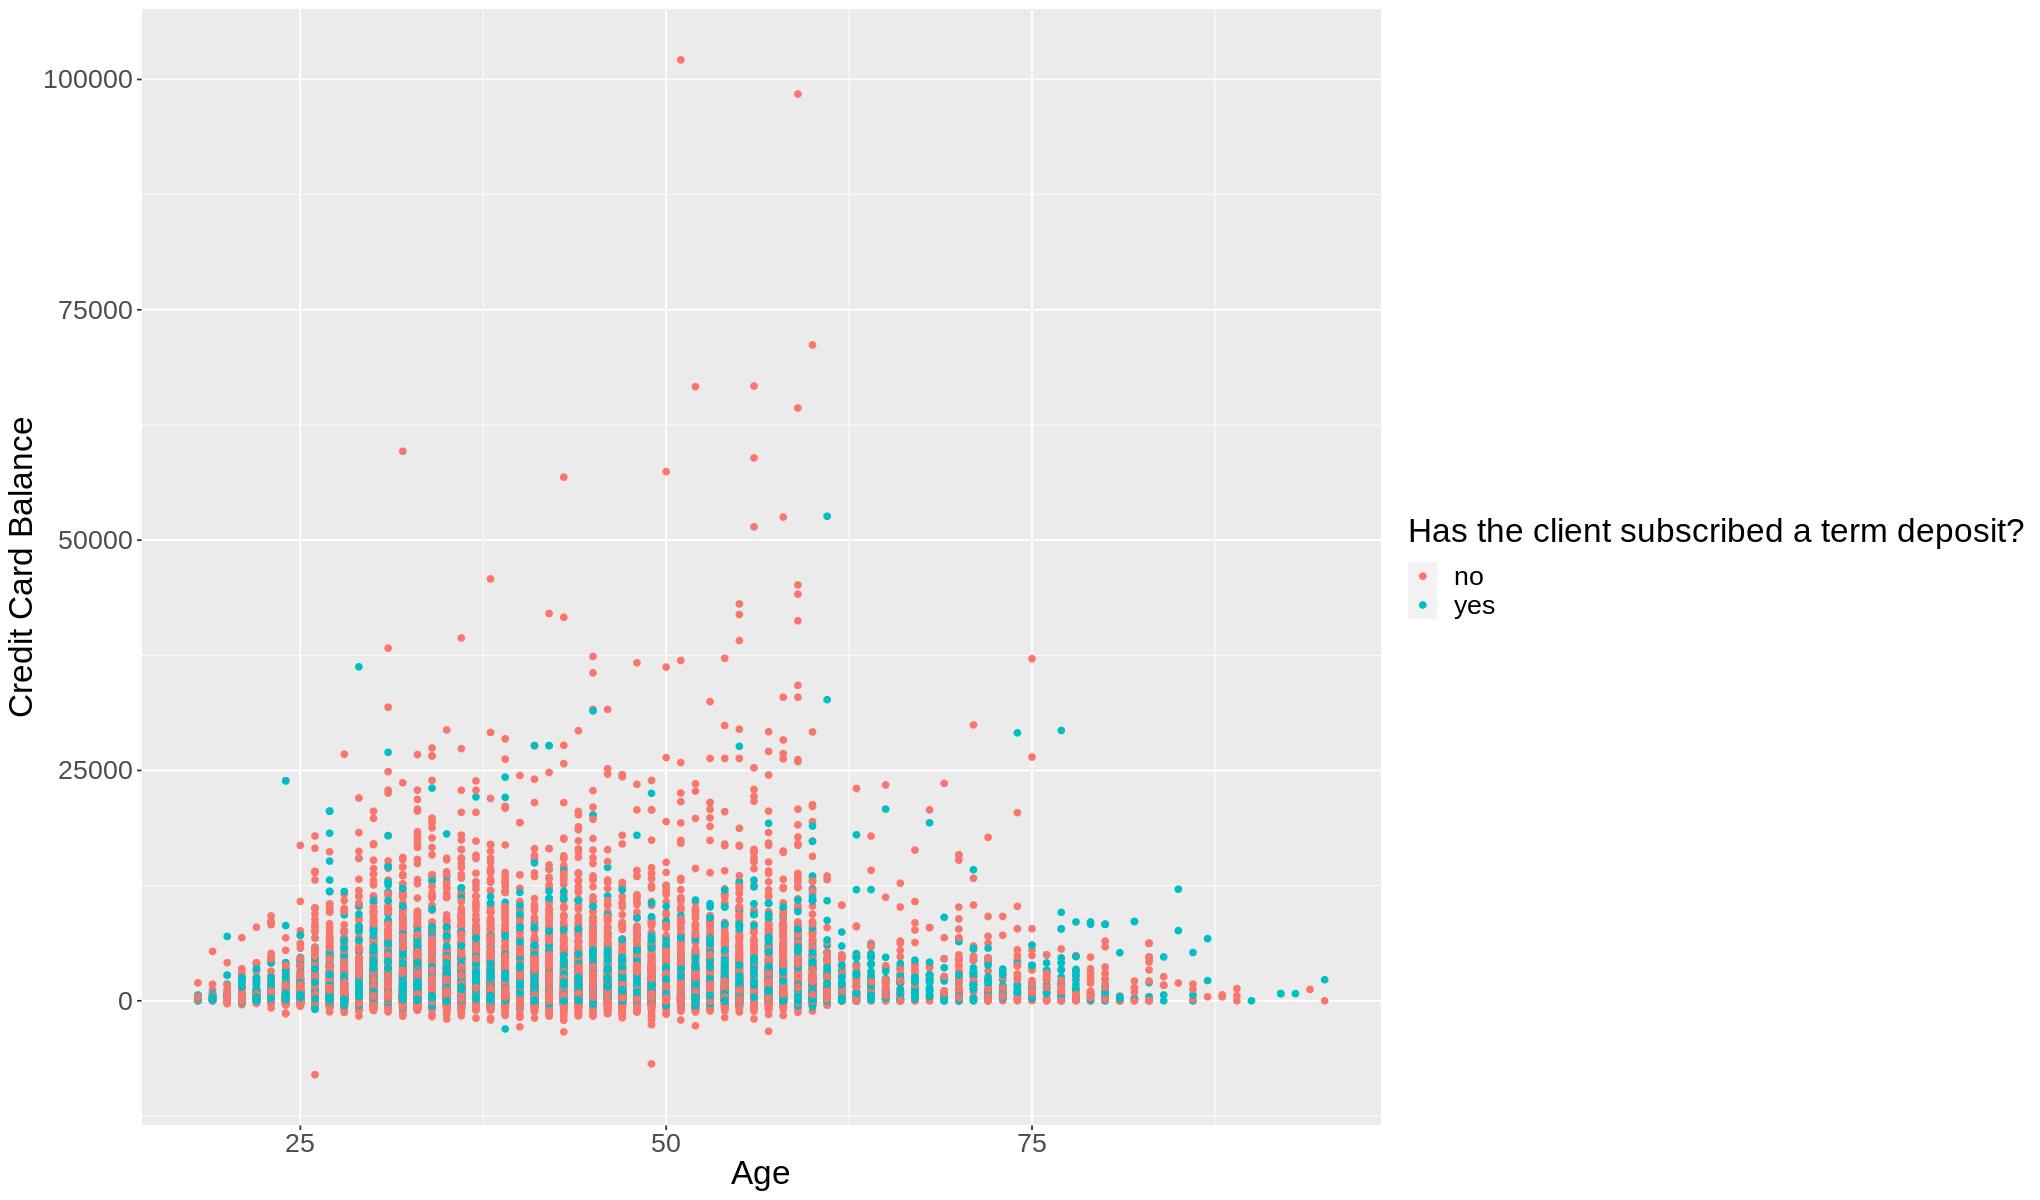

In [72]:
#scattor plot of age and balance
options(repr.plot.width = 17, repr.plot.height = 10) 
age_balance_plot <- bank_train %>%
    ggplot(aes(x = age, y =  balance)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Age", y = "Credit Card Balance", colour = "Has the client subscribed a term deposit?") + 
        theme(text = element_text(size=20))

age_balance_plot

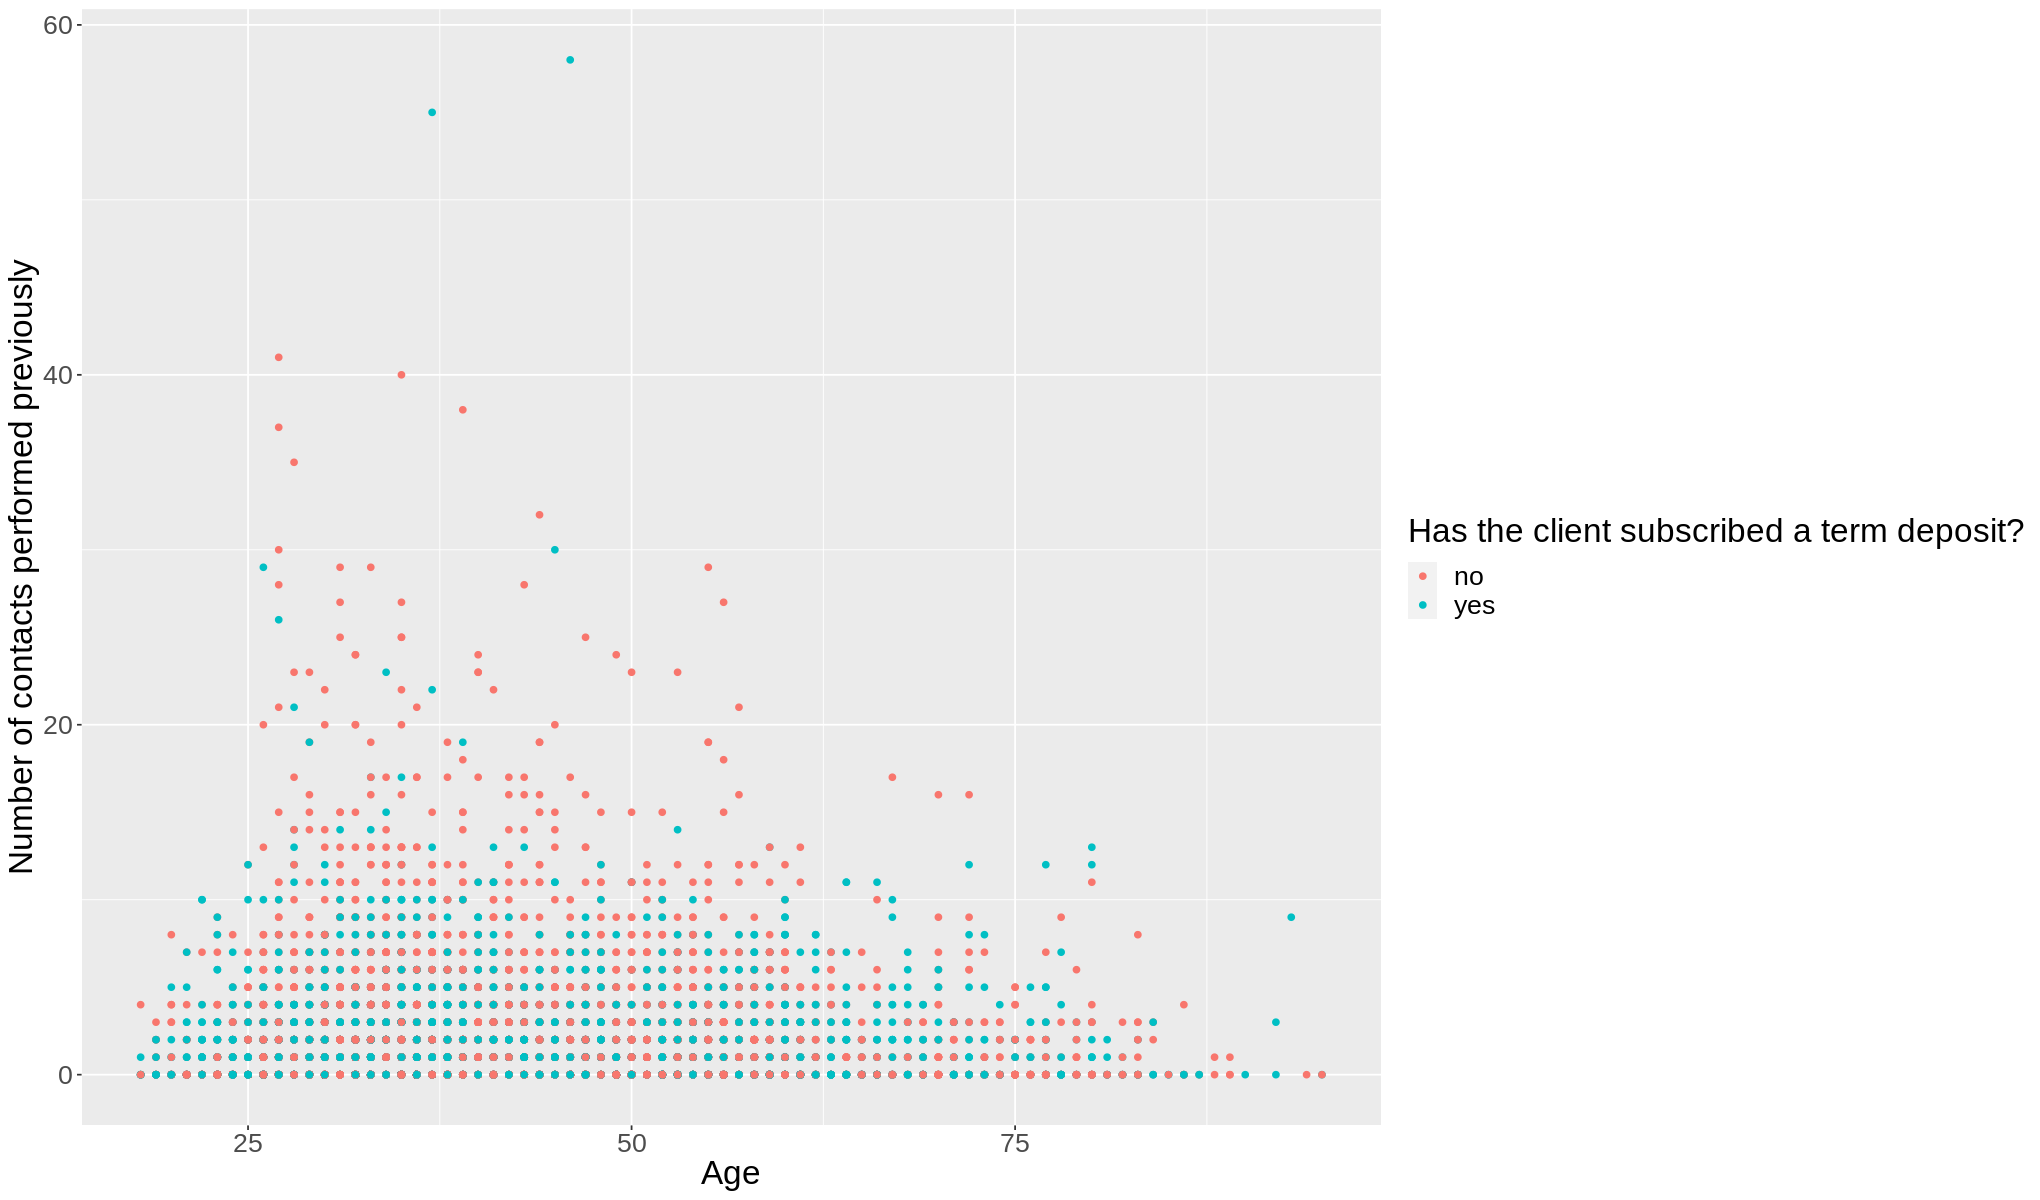

In [75]:
#scattor plot of age and previous
options(repr.plot.width = 17, repr.plot.height = 10) 
age_previous_plot <- bank_train %>%
    ggplot(aes(x = age, y =  previous)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Age", y = "Number of contacts performed previously", colour = "Has the client subscribed a term deposit?") + 
        theme(text = element_text(size=20))

age_previous_plot

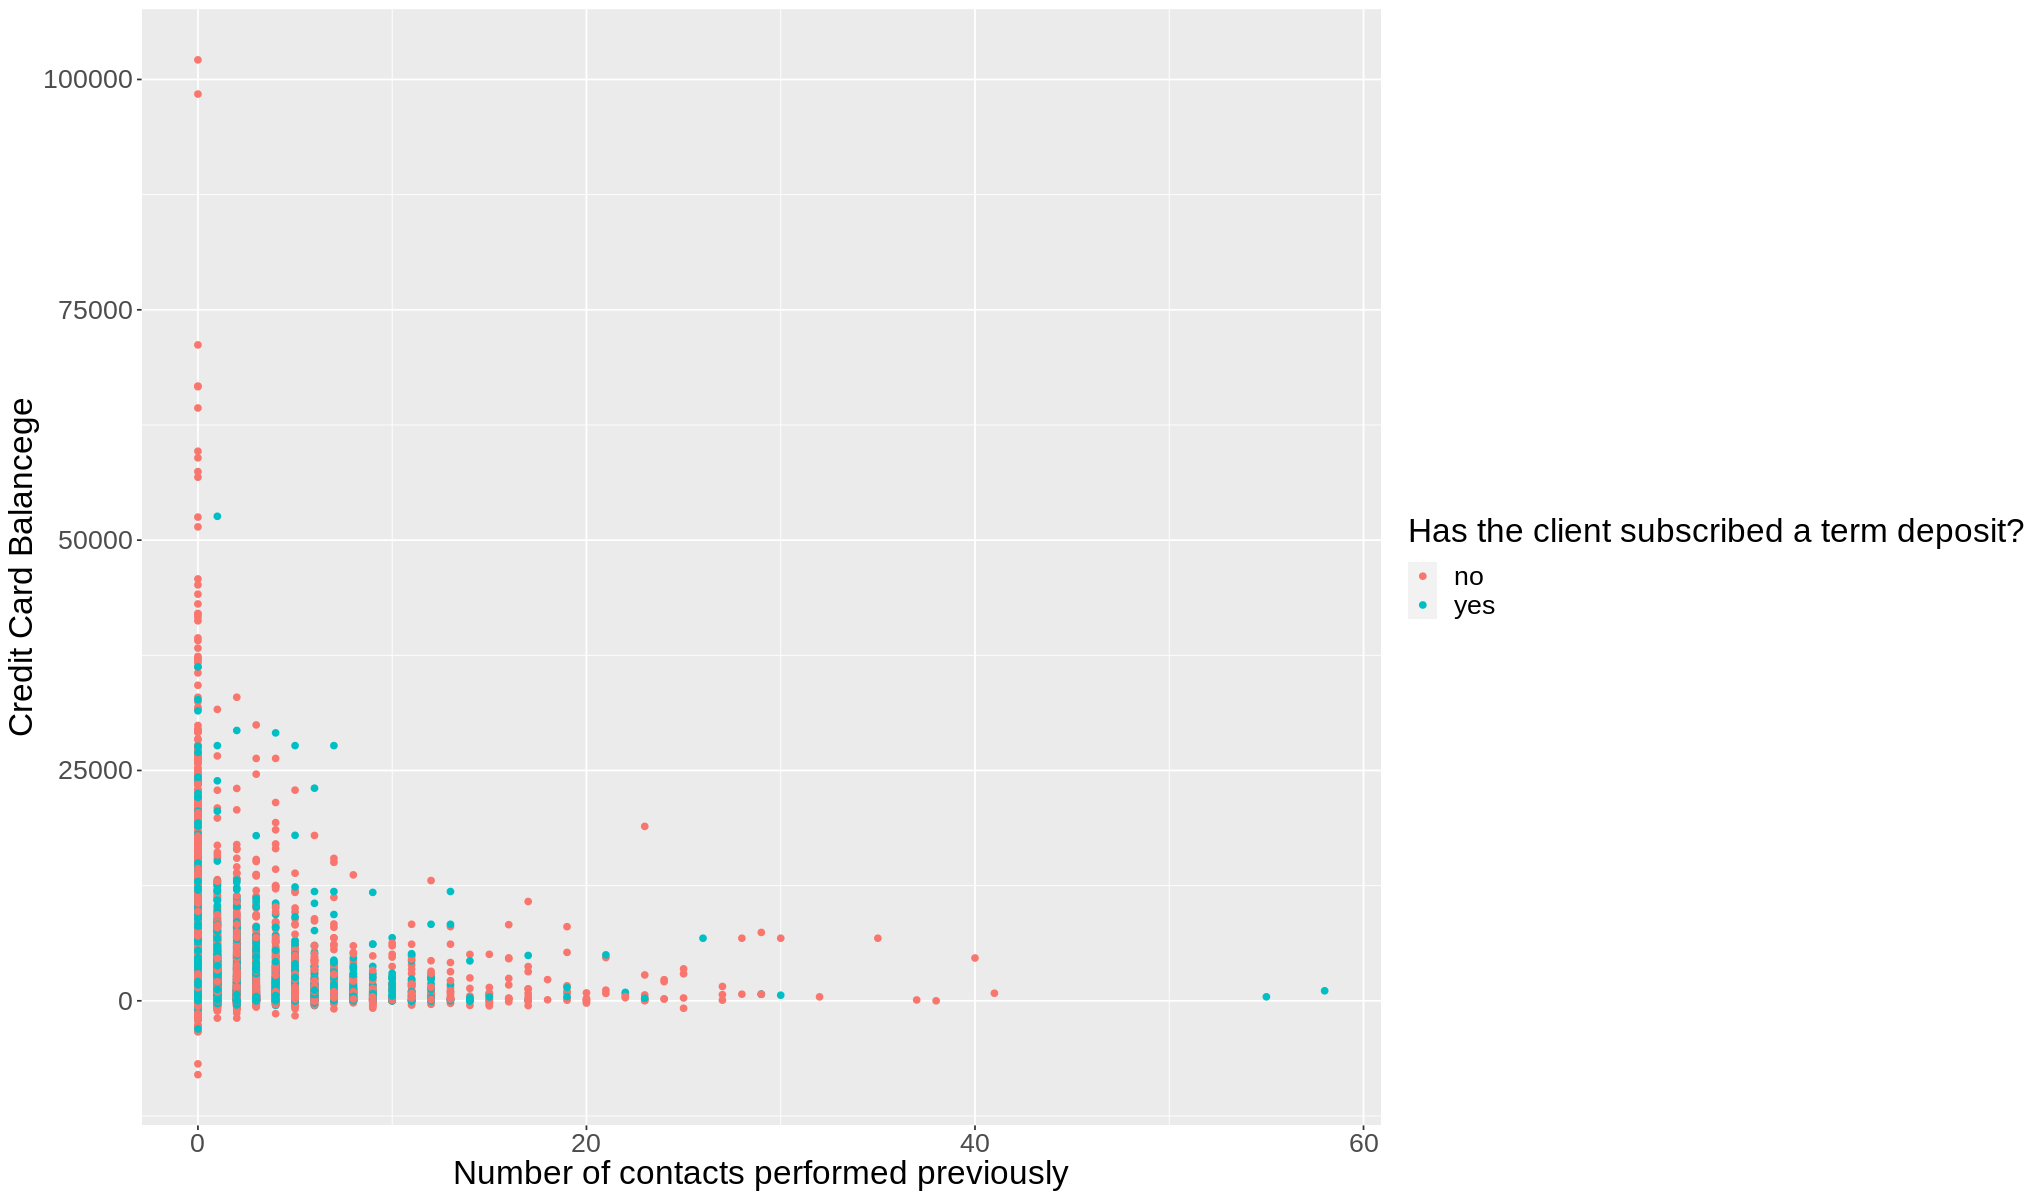

In [77]:
#scattor plot of balance and previous
options(repr.plot.width = 17, repr.plot.height = 10) 
age_previous_plot <- bank_train %>%
    ggplot(aes(x = previous, y =  balance)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Number of contacts performed previously", y = "Credit Card Balancege", colour = "Has the client subscribed a term deposit?") + 
        theme(text = element_text(size=20))

age_previous_plot

Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use.
Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. 
For each variable think: is this a useful variable for prediction?

K- nearest neighbours: To classify an example xitilda:
1. Find the ‘k’ training examples xi that are “nearest” to  xitilda.
2. Classify using the most common label of “nearest” training examples.

Using L2 norm("euclidean norm") : ||r2||_2 = sqrt(r1^2 + r2^2)
k = split data into training and validation data, then use validation error to choose k. 

Decision tree???

bank.csv
The predicted label( variable y) is if or not the client will subscribe (yes/no) a term deposit. 
The features (variable x): 6 choosen from 16 variables

# bank client data: 
age (numeric); job : type of job (categorical);  loan: has personal loan? (categorical: 'no','yes','unknown');

# social and economic context attributes:
employment variation rate - quarterly indicator (numeric); consumer price index - monthly indicator (numeric) ; 

# other attributes: campaign: 
number of contacts performed during this campaign and for this client (numeric, includes last contact)

<p>By using a scatterplot, with ... variable on x-axis and ... on y-axis
Each point in the plane is colored with the class(yes or no) that would be assigned to it <br>
using the K-Nearest Neighbors algorithm.<br>
    ![knn]("DSCI-100_group_project/image/knn_example_image.png")

http://vision.stanford.edu/teaching/cs231n-demos/knn/